In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

dataset

In [30]:
data = pd.read_csv('./predictive_maintenance.csv')

data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [31]:
print(data.shape)

(10000, 10)


In [32]:
X =data [['Torque [Nm]','Tool wear [min]']].values
y = data['Target']

print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


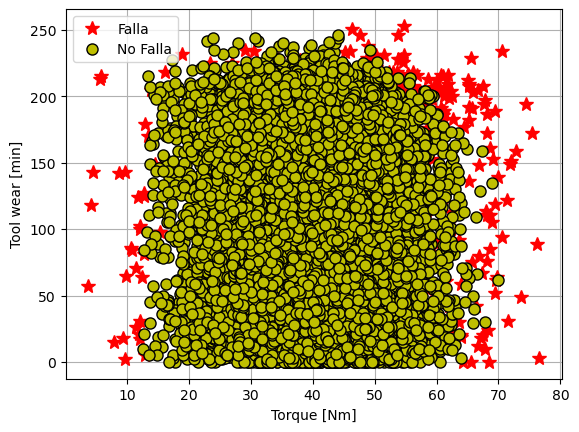

In [ ]:


def plotData(X, y):
    # Crear figura
    fig = pyplot.figure()

    # Índices de fallas y no fallas
    pos = y == 1   # Falla
    neg = y == 0   # No Falla

    # Dibujar ejemplos
    pyplot.plot(X[pos, 0], X[pos, 1], 'r*', lw=2, ms=10, label='Falla')
    pyplot.plot(X[neg, 0], X[neg, 1], 'bo', mfc='y', ms=8, mec='k', mew=1, label='No Falla')

    # Etiquetas
    pyplot.xlabel('Torque [Nm]')
    pyplot.ylabel('Tool wear [min]')
    pyplot.legend()
    pyplot.grid(True)
    pyplot.show()


# --- Preparar datos ---
X = data[['Torque [Nm]', 'Tool wear [min]']].values
y = data['Target'].values

# Llamar a la función
plotData(X, y)


In [34]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [35]:
# Prueba la implementacion de la funcion sigmoide
z = [-100, 0.5, 1000000]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [-100, 0.5, 1000000] ) =  [3.72007598e-44 6.22459331e-01 1.00000000e+00]


In [36]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X)

[[ 1.  42.8  0. ]
 [ 1.  46.3  3. ]
 [ 1.  49.4  5. ]
 ...
 [ 1.  33.4 22. ]
 [ 1.  48.5 25. ]
 [ 1.  40.2 30. ]]


In [37]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [38]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.00312258 -0.06468826 -0.0046793 ]
Probabilidad de falla para Torque=42 y Tool wear=10 (usando el descenso por el gradiente):0.06


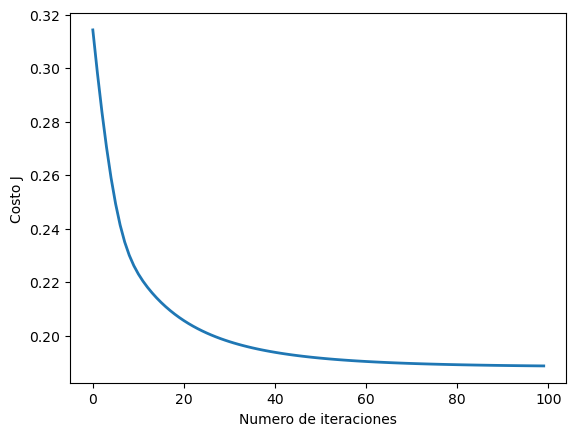

In [40]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si habrá falla o no
X_array = [1, 42, 10]   # 1 para el intercepto, Torque=42, Tool wear=10
aprueba = sigmoid(np.dot(X_array, theta))

print('Probabilidad de falla para Torque=42 y Tool wear=10 (usando el descenso por el gradiente):{:.2f}'.format(aprueba))
